In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from pandas import *
from itertools import groupby
np.random.seed(1234)


['run-20220420_140310000-tag-Test Error_u.csv', 'run-20220420_140310000-tag-Test Error_v.csv', 'run-20220420_140310000-tag-Train_u.csv', 'run-20220420_140310000-tag-Train_v.csv']
['run-20220420_14035000-tag-Test Error_u.csv', 'run-20220420_14035000-tag-Test Error_v.csv', 'run-20220420_14035000-tag-Train_u.csv', 'run-20220420_14035000-tag-Train_v.csv']
['run-20220420_1458500-tag-Test Error_u.csv', 'run-20220420_1458500-tag-Test Error_v.csv', 'run-20220420_1458500-tag-Train_u.csv', 'run-20220420_1458500-tag-Train_v.csv']
['run-20220421_16061000-tag-Test Error_u.csv', 'run-20220421_16061000-tag-Test Error_v.csv', 'run-20220421_16061000-tag-Train_u.csv', 'run-20220421_16061000-tag-Train_v.csv']
['run-20220421_16062000-tag-Test Error_u.csv', 'run-20220421_16062000-tag-Test Error_v.csv', 'run-20220421_16062000-tag-Train_u.csv', 'run-20220421_16062000-tag-Train_v.csv']
['run-20220421_1606500-tag-Test Error_u.csv', 'run-20220421_1606500-tag-Test Error_v.csv', 'run-20220421_1606500-tag-Train_u.

<Figure size 432x288 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

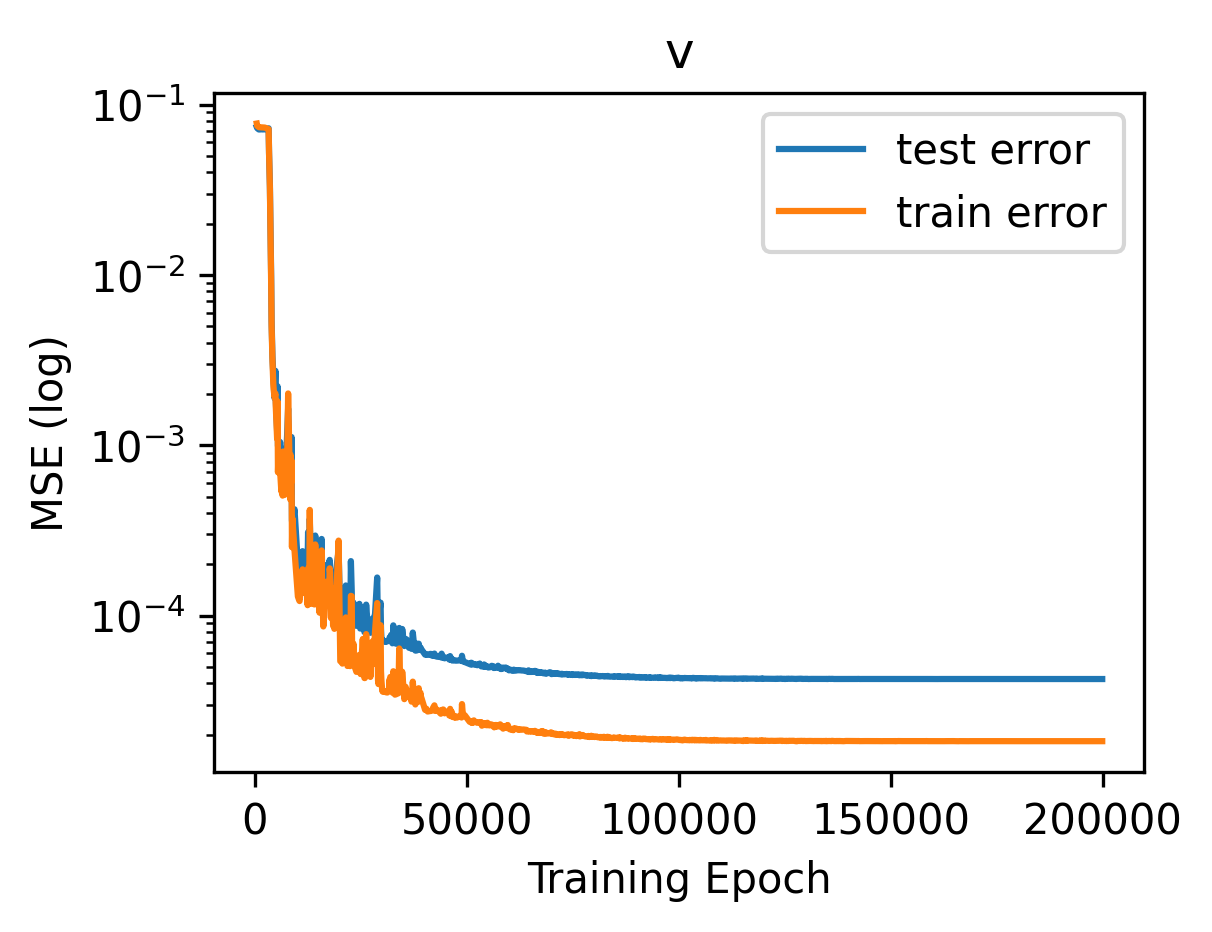

In [2]:
data_path = './data/train'
files = []
file_paths = []
for file in os.listdir(data_path):
    # print(file)
    files.append(file)

# group by training date
files = [list(g) for k, g in groupby(sorted(files), lambda x: x.split('-', 2)[:2])]
files.sort(key=lambda s: len(s))
for f in files:
    print(f)


def plot(xs, ys, ls, savepath='', title=''):
    plt.clf()
    plt.figure(figsize=(4, 3), dpi=300)
    print(len(xs), len(ys), ls)
    for x, y, l in zip(xs, ys, ls):
        plt.plot(x,y,label=l)
    plt.legend()
    plt.title(title)
    plt.yscale('log')
    plt.ylabel('MSE (log)')
    plt.xlabel('Training Epoch')
    plt.savefig(savepath, bbox_inches='tight', dpi=300)

xs, ys = [], []
# idx = 2 # the group
keyword = '481000-'
# for f in files[idx]: 
for group in files:
    if keyword in group[0]:
        for f in group:
            if '_u' in f:
                file_path = os.path.join(data_path, f)
                data = read_csv(file_path)
                xs.append(data['Step'])
                ys.append(data['Value'])
plot(xs, ys, ls=['test error', 'train error'], savepath=f'./figures/compare_u.png', title='u')


xs, ys = [], []
# for f in files[idx]:
for group in files:
    if keyword in group[0]:
        for f in group:
            if '_v' in f:
                file_path = os.path.join(data_path, f)
                data = read_csv(file_path)
                xs.append(data['Step'])
                ys.append(data['Value'])
plot(xs, ys, ls=['test error', 'train error'], savepath=f'./figures/compare_v.png', title='v')


# for i, f in enumerate(files[0]):
#     file_path = os.path.join(data_path, f)
#     print(f)
#     data = read_csv(file_path)
#     xs.append(data['Step'])
#     ys.append(data['Value'])
#     if (i+1) % 2 == 0:
#         figname = 'compare_u' if '_u' in f else 'compare_v'
#         plot(xs, ys, ls=['test error', 'train error'], savepath=f'./figures/{figname}.png')
#         xs, ys = [], []



In [22]:
a=100*100*(256)**3

In [25]:
b=3600*24*365

In [27]:
print(a, b, float(a)/b/8)

167772160000 31536000 665.0025367833587
